In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts

In [150]:
#%% 获取历史行情数据
t = pd.read_excel(r"E:\RH\t.xlsx",dtype={'ddate':'datetime64'})

t.rename(columns={'ddate':'date','sclose':'close'},inplace=True)

t.set_index('date',inplace=True)

In [3]:
#%%
now = ts.get_hist_data(code='sz50', start=None, end=None, ktype='5',retry_count=3, pause=0.001)
now.sort_values(by='date',ascending=True, inplace=True)

print('Data prepared!')

Data prepared!


In [4]:
#%%
len_t, len_now = len(t), len(now)
max_corr, max_index = 0, -1
corr = list()
for i in range(0, len_t-len_now):
    temp_corr = np.corrcoef(x=t[i:i+len_now]['close'], y=now['close'])
    corr.append(temp_corr[1])
corr = pd.DataFrame(corr)
ans = corr[corr[0] > 0.75]
t=t.close
print('Correlation done')

Correlation done


In [5]:
corr

,0,1
0,0.247817,1.0
1,0.241273,1.0
2,0.233868,1.0
3,0.227044,1.0
4,0.221269,1.0
5,0.216264,1.0
6,0.210654,1.0
7,0.204438,1.0
8,0.197277,1.0
9,0.189828,1.0


In [7]:
group_list=[]; group=0; last_i=0
for i in ans.index:
    if i-last_i != 1: 
        group += 1
        last_i = i
    else:
        last_i += 1
    group_list.append(group)
ans = pd.DataFrame({0:list(ans[0]),1:group_list}, index=ans.index)
ans_groups = ans.groupby(1)

In [8]:
ans

,0,1
2040,0.752546,1
2041,0.758967,1
2042,0.763909,1
2043,0.768256,1
2044,0.772204,1
2045,0.774034,1
2046,0.775711,1
2047,0.775628,1
2048,0.774177,1
2049,0.772474,1


In [9]:
#%% 计算概率
forward_length = 320
index_max_corr = [int(ans_groups.get_group(j+1).idxmax()[0]) for j in range(ans_groups.size().size)]
prob_up = sum(t[i]<t[i+len_now+forward_length] for i in index_max_corr) / ans_groups.size().size
prob_down = 1-prob_up
print('prob_up: {}; prob_down: {}'.format(prob_up, prob_down))

if prob_up>prob_down:
    for i in index_max_corr:
        if t[i]<t[i+len_now+forward_length]:
            ans.loc[i, 'more_likely'] = 1
else:
    for i in index_max_corr:
        if t[i]>t[i+len_now+forward_length]:
            ans.loc[i, 'more_likely'] = 1

best_history_index = ans.where(ans.more_likely!=0).idxmax()[0]

prob_up: 0.8947368421052632; prob_down: 0.10526315789473684


In [10]:
TARGET_DAYS = [5, 20]
FREQUENCY = 15
TARGET_WINDOWS = [int(i*4*60/FREQUENCY) for i in TARGET_DAYS]

In [11]:
def cal_prob(d:int):
    forward_length = TARGET_WINDOWS[d]
    index_max_corr = [
        int(ans_groups.get_group(j + 1).idxmax()[0]) for j in range(ans_groups.size().size)
    ]
    prob_up = sum(t[i] < t[i + len_now + forward_length]
                  for i in index_max_corr) / ans_groups.size().size
    prob_down = 1 - prob_up
    return prob_up, prob_down
cal_prob(1)

(0.8947368421052632, 0.10526315789473684)

In [12]:
#%% 调整坐标及缩放
i=best_history_index

future=dict()
future['upper']=t[i:i+len_now+forward_length].max()
future['lower']=t[i:i+len_now+forward_length].min()
future['mid']=(future['upper']+future['lower'])/2
future['width']=future['upper']-future['lower']
future['average']=t[i:i+len_now+forward_length].mean()
future['upward']=future['upper']-future['average']
future['downward']=future['average']-future['lower']

curt=dict()
curt['upper']=now['close'].max()
curt['lower']=now['close'].min()
curt['average']=now['close'].mean()
curt['width']=curt['upper']-curt['lower']
curt['mid']=(curt['upper']+curt['lower'])/2

a = (curt['lower']-curt['width']*future['downward']/future['width']*5)*future['average']/curt['average']
b = (curt['upper']+curt['width']*future['upward']/future['width']*3)*future['average']/curt['average']

In [13]:
During = t[best_history_index:best_history_index + len_now + forward_length].index
during = sorted(list(set(During.floor('D'))))
During.strftime('%m/%d/%Y')

Index(['09/06/2010', '09/06/2010', '09/06/2010', '09/06/2010', '09/06/2010',
       '09/06/2010', '09/06/2010', '09/06/2010', '09/06/2010', '09/06/2010',
       ...
       '11/05/2010', '11/08/2010', '11/08/2010', '11/08/2010', '11/08/2010',
       '11/08/2010', '11/08/2010', '11/08/2010', '11/08/2010', '11/08/2010'],
      dtype='object', length=670)

In [14]:
during[0].toordinal(), t.index[best_history_index].toordinal(),len_now + forward_length,len(During)

(734021, 734021, 670, 670)

In [15]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.dates as mdates
#修改主刻度
xmajorLocator = MultipleLocator(20) #将x主刻度标签设置为20的倍数
xmajorFormatter = FormatStrFormatter('%M/%D/%Y') #设置x轴标签文本的格式
#设置主刻度标签的位置,标签文本的格式
ax.xaxis.set_major_locator(xmajorLocator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax2.xaxis.set_major_locator(xmajorLocator)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))


NameError: name 'ax' is not defined

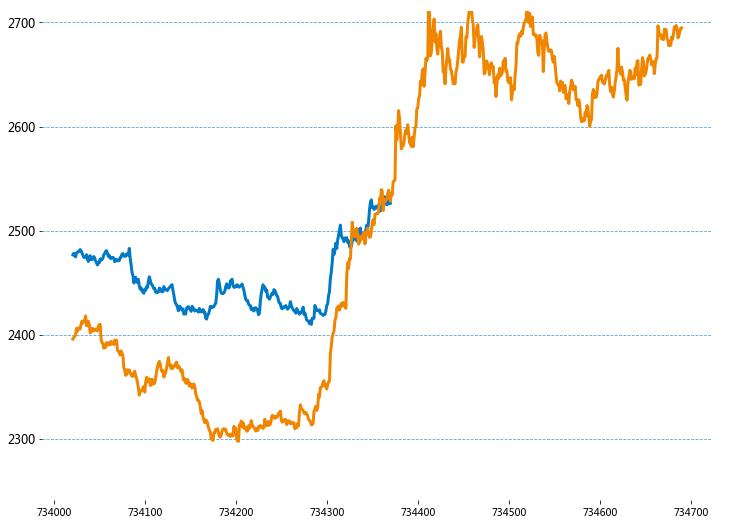

In [142]:
fig = plt.figure()
fig.set_size_inches(12, 9)

# 放置主坐标轴（左轴），用于标示当前行情序列
ax = fig.add_subplot(111)
ax.plot(range(t.index[best_history_index].toordinal(), t.index[best_history_index].toordinal() + len_now), 
        now['close'], linewidth=3, label='current', c='#007ac6')
plt.ylim((curt['mid'] - future['downward'] * 1, curt['mid'] + future['upward'] * 1)) #调整刻度，更美观地对其
plt.grid(color='#007ac6', alpha=0.7, axis='y',linestyle = 'dashed')
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# 放置次坐标轴（右轴），用于标示历史行情序列
ax2 = ax.twinx()
history = t[best_history_index:best_history_index + len_now + forward_length]
ax2.plot(
    range(t.index[best_history_index].toordinal(), t.index[best_history_index].toordinal()+len_now+forward_length), 
    history, linewidth=3, label='history', c='#f08600')
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.ylim((a, b))
plt.axis('off')

# 标记x轴
plt.xticks()

fig.savefig('.\curve.png', dpi=144, bbox_inches='tight')
fig.savefig('.\curve [矢量图].pdf', dpi=144, bbox_inches='tight')


In [124]:
import openpyxl
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Font, Border, numbers, Side, Alignment
from openpyxl.drawing.image import Image

In [125]:
index_symbol = '000001.SH'
font_col = Font(name='dengxian', size=20, bold=True, color='FFFFFFFF')
font_panzheng = Font(name='dengxian', size=19, bold=True, color='FFF08600')
font_prob = Font(name='dengxian', size=19, bold=False, color='FF007AC6')

fill_col = PatternFill(fill_type='solid', start_color='FF0070C6', end_color='FF0070C6')
fill_row = PatternFill(fill_type='solid', start_color='FFE4F3FC', end_color='FFE4F3FC')
fill_prob = PatternFill(fill_type='solid', start_color='FFF7F7F7', end_color='FFF7F7F7')

format_percent = numbers.BUILTIN_FORMATS[9]

border_corner1 = Border(left=Side(border_style='thick',color='FF999999'),
                        right=Side(border_style='thin',color='FFFFFFFF'), 
                        top=Side(border_style='thick',color='FF999999'),
                        bottom=Side(border_style='thin',color='FFFFFFFF'))
border_corner2 = Border(left=Side(border_style='thin',color='FFFFFFFF'),
                        right=Side(border_style='thick',color='FF999999'), 
                        top=Side(border_style='thick',color='FF999999'),
                        bottom=Side(border_style='thin',color='FFFFFFFF'))
border_corner3 = Border(left=Side(border_style='thin',color='FFFFFFFF'),
                        right=Side(border_style='thick',color='FF999999'), 
                        top=Side(border_style='thin',color='FFFFFFFF'),
                        bottom=Side(border_style='thick',color='FF999999'))
border_corner4 = Border(left=Side(border_style='thick',color='FF999999'),
                        right=Side(border_style='thin',color='FFFFFFFF'), 
                        top=Side(border_style='thin',color='FFFFFFFF'),
                        bottom=Side(border_style='thick',color='FF999999'))
border_up = Border(left=Side(border_style='thin',color='FFFFFFFF'),
                        right=Side(border_style='thin',color='FFFFFFFF'), 
                        top=Side(border_style='thick',color='FF999999'),
                        bottom=Side(border_style='thin',color='FFFFFFFF'))
border_left = Border(left=Side(border_style='thick',color='FF999999'),
                        right=Side(border_style='thin',color='FFFFFFFF'), 
                        top=Side(border_style='thin',color='FFFFFFFF'),
                        bottom=Side(border_style='thin',color='FFFFFFFF'))
border_right = Border(left=Side(border_style='thin',color='FFFFFFFF'),
                        right=Side(border_style='thick',color='FF999999'), 
                        top=Side(border_style='thin',color='FFFFFFFF'),
                        bottom=Side(border_style='thin',color='FFFFFFFF'))
border_down = Border(left=Side(border_style='thin',color='FFFFFFFF'),
                        right=Side(border_style='thin',color='FFFFFFFF'), 
                        top=Side(border_style='thin',color='FFFFFFFF'),
                        bottom=Side(border_style='thick',color='FF999999'))
border_inside = Border(left=Side(border_style='thin',color='FFFFFFFF'),
                        right=Side(border_style='thin',color='FFFFFFFF'), 
                        top=Side(border_style='thin',color='FFFFFFFF'),
                        bottom=Side(border_style='thin',color='FFFFFFFF'))
alignment=Alignment(horizontal='center',vertical='center',text_rotation=0,wrap_text=False,shrink_to_fit=False,indent=0)

In [144]:
wb = Workbook()
ws = wb.active

prob_up_5, prob_down_5 = cal_prob(0)
prob_up_20, prob_down_20 = cal_prob(1)

ws.append(['5天','概率', '20天', '概率'])
ws.append(['', prob_up_5, '', prob_up_20])
ws.append(['盘整', 0, '盘整', 0])
ws.append(['', prob_down_5, '', prob_down_20])

up, up2 = Image(r'E:\\up.png'), Image(r'E:\\up.png')
down, down2 = Image(r'E:\\down.png'), Image(r'E:\\down.png')
ws.add_image(up, 'A2')
ws.add_image(up2, 'C2')
ws.add_image(down, 'A4')
ws.add_image(down2, 'C4')

In [145]:
for c in ['A','B','C','D']:
    ws.column_dimensions[c].width = 20
for r in range(1,5):
    ws.row_dimensions[r].height = 35

for row in range(1,5):
    for col in range(4):
        ws[row][col].border = border_inside
ws[1][0].border, ws[1][3].border, ws[4][3].border, ws[4][0].border = border_corner1, border_corner2, border_corner3, border_corner4
ws[1][1].border, ws[1][2].border = border_up, border_up
ws[4][1].border, ws[4][2].border = border_down, border_down
ws[2][0].border, ws[3][0].border = border_left, border_left
ws[2][3].border, ws[3][3].border = border_right, border_right

for row in range(1,5):
    for col in [0,2]:
        ws[row][col].fill = fill_row
        ws[row][col].font = font_col
        ws[row][col].alignment = alignment
    for col in [1,3]:
        ws[row][col].fill = fill_prob
        ws[row][col].font = font_prob
        ws[row][col].number_format = format_percent
        ws[row][col].alignment = alignment
for col in range(4):
    ws[1][col].fill = fill_col
    ws[1][col].font = font_col
ws[3][0].font, ws[3][2].font = font_panzheng, font_panzheng

In [146]:
curve=Image('.\curve.png')
ws.add_image(curve, 'A6')

In [147]:
index_symbol = '000016.SH'
wb.save("E:\\RH\\"+index_symbol+"_Probability.xlsx")

In [148]:
from win32com import client

xlApp = client.Dispatch("Excel.Application")
books = xlApp.Workbooks.Open(r"E:\RH\000016.SH_Probability.xlsx")
books.ExportAsFixedFormat(0, r"E:\RH\000016.SH_Probability")
xlApp.Quit()